In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis as curt

# 1)

In [10]:
iris = pd.read_csv("iris.csv", names=['sepal length','sepal width','petal length','petal width','class'])

<AxesSubplot:>

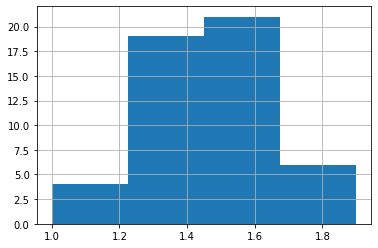

In [18]:
iris[iris['class']=='Iris-setosa']['petal length'].hist(bins=4)

# 2)

In [19]:
groups = iris.groupby('class')

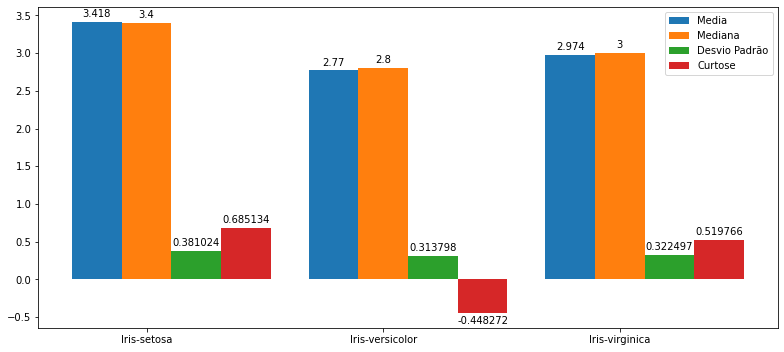

In [60]:
medias   = []
desvios  = []
curtoses = []
medianas = []
labels_groups = list(groups.groups.keys())

for g in labels_groups:
    m  = groups.get_group(g)['sepal width'].mean()
    s  = groups.get_group(g)['sepal width'].std()
    c  = curt(groups.get_group(g)['sepal width'].values)
    md = groups.get_group(g)['sepal width'].median()

    medias.append(m)
    desvios.append(s)
    curtoses.append(c)
    medianas.append(md)

x = np.arange(len(labels_groups)) 
width = 0.21
labels = ['Media','Mediana','Desvio Padrão','Curtose']
arrays = [medias, medianas, desvios, curtoses]
rects = []
fig, ax = plt.subplots(figsize=(11,5))
x = x - width
for i, arr in enumerate(arrays):
    rects1 = ax.bar(x, arr, width, label=labels[i])
    ax.bar_label(rects1, padding=3)
    x = x + width
ax.set_xticks(np.arange(len(labels_groups)) , labels_groups)
ax.legend()
plt.tight_layout()


A característica que mais muda nas diferentes espécies é a curtose, que na espécie Versicolor possui um valor negativo de $-0.448$. Nas outras espécies, a média e mediana são próximos, bem como a diferença entre a Curtose e o Desvio padrão.

# 3)
   - Usuários de 35 a 45 anos consomem $\approx31\%$ de conteúdo sobre Cultura, o que equivale à soma das duas outras faixas etárias;
   - Usuários de 25 a 45 anos consomem mais conteúdo de Política que usuários entre 15 e 15 anos, $\approx30\%$ e $\approx10\%$, respectivamente;
   - O interesse dos usuários em conteúdos de Celebridades decresce de acordo a faixa etária aumenta:
      - 15 a 25 anos: $30\%$
      - 25 a 35 anos: $15\%$
      - 35 a 45 anos: $5\%$
   - O interesse dos usuários em Jogos varia pouco entre as $3$ faixas etárias. Com $25\%$ em usuários de 15 a 25 anos e $\approx20\%$ nos usuários de 25 a a 45;
   - Usuários de 25 a 35 anos consomem mais conteúdos sobre Esporte que usuários entre 15 e 25, e 35 a 45, respectivamente, $25\%$, $15\%$ e $\approx12\%$

 

# 4)

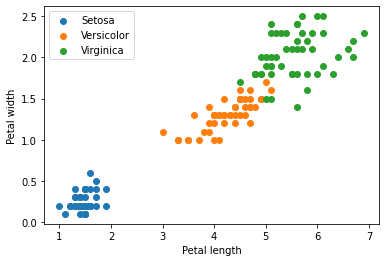

In [74]:
iris_setosa = iris[iris['class']=='Iris-setosa'][['petal length','petal width']]
iris_versicolor = iris[iris['class']=='Iris-versicolor'][['petal length','petal width']]
iris_virginica = iris[iris['class']=='Iris-virginica'][['petal length','petal width']]
plt.scatter(iris_setosa['petal length'],iris_setosa['petal width'], label='Setosa')
plt.scatter(iris_versicolor['petal length'],iris_versicolor['petal width'], label='Versicolor')
plt.scatter(iris_virginica['petal length'],iris_virginica['petal width'], label='Virginica')
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.show()

O gráfico anterior mostra que há correlação entre o comprimento e largura da pétala, de forma que é possível inferir, com certo grau de certeza, qual a largura de uma pétela com base em seu comprimento.

# 5)

fonte: https://www.poder360.com.br/midia/internet-e-principal-meio-de-informacao-para-43-tv-e-preferida-de-40/

In [84]:
# 16-24 | 25-44 | 45-59 | 60+
dict_coms = {
    'TV': [32, 30, 43, 65],
    'Redes Sociais': [35, 17, 28, 15],
    'Sites e Portais':[12, 32, 18, 8],
    'Rádio': [1, 6, 9, 10],
    'Outros': [20, 11, 1, 0]
}

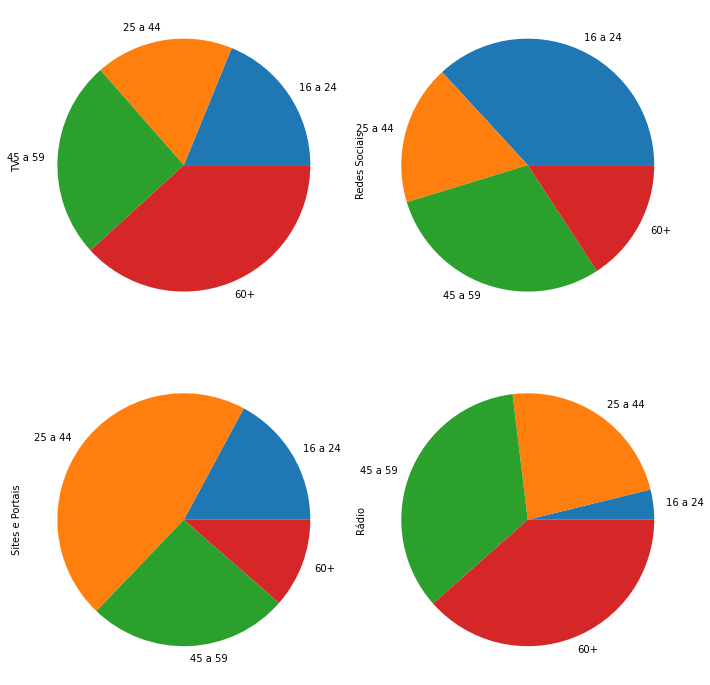

In [97]:
df_comunicacao = pd.DataFrame(dict_coms, index=['16 a 24', '25 a 44', '45 a 59', '60+'])
columns = df_comunicacao.columns
fig, ax  = plt.subplots(ncols=2,nrows=2, figsize=(10,10))
ix = 0
for i in range(2):
    for j in range(2):
        df_comunicacao[columns[ix]].plot(kind='pie', ax=ax[i][j])
        ix+=1
plt.tight_layout()


# 7)

No geral, apenas $33\%$ da população acha justo que clínicas privadas possam oferecer vacinas para quem possa pagar. Essa porcentagem é levemente maior entre os homens ($34\%$) e levemente menor entre as mulheres $32\%$. Considerando a faixa etária, a porcentagem é maior entre pessoas de $45$ a $59$ anos ($44\%$). AS regiões com maior porcentagem são Sul e Norte, com $50\%$ e $40\%$, respectivamente. Nota-se que as duas regiões possuem uma porcentagem equivalente às outras 3 regiões somadas Sudeste ($29\%$), Nordeste($28\%$) e Centro-oeste ($30\%$). A porcentagem entre pessoas com ensino superior é de $47\%$, apenas $14\%$ de diferença entre os dois outros níveis de escolaridade considerados. Por fim, a maioria ($60\%$) das pessoas com renda superior à 10 salários mínimos acha justo que clínicas privadas possam oferecer vacinas para quem possa pagar. Como era de se esperar, considerando a renda, a porcentagem de pessoas que acham justo tende a ser menor à medida que o intervalo da renda diminui.